## Run community detection experiments

Do this for Louvain algorithm.

And hopefully eADAGE & coexpression networks, if time...

In [2]:
import os

import numpy as np
import pandas as pd
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
import seaborn as sns

from sample_nodes import (
    sample_degree_matched,
    sort_by_degree,
)

np.random.seed(42)

In [3]:
# relevant file paths
data_dir = './data'
edge_list = os.path.join(data_dir, 'edge_list_processed.csv')

# script parameters
NUM_NODE_SAMPLES = 100 # number of degree-matched node samples for permutation test

In [9]:
graph_df = pd.read_csv(edge_list)
graph_df.head()

,from,to,weight
0,PA0001,PA0002,0.578872
1,PA0001,PA0548,0.510323
2,PA0001,PA0963,0.561494
3,PA0001,PA3637,0.512365
4,PA0001,PA5554,0.554768


In [12]:
G = ig.Graph.DataFrame(graph_df, directed=False)

In [13]:
# make sure vertex/edge properties exist
print(G.es['weight'][:5])

[0.578871792667748, 0.510322953238081, 0.561494130101994, 0.512364523924246, 0.554767556277657]


Text(0.5, 1.0, 'Number of communities, generic genes vs. 100 degree-matched samples')

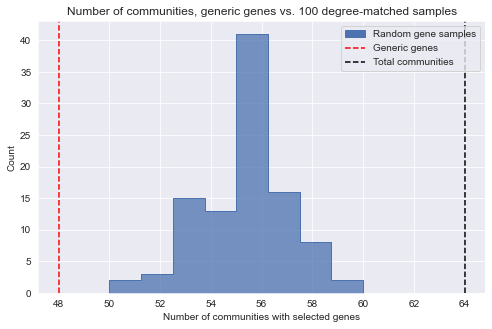

In [11]:
sns.set({'figure.figsize': (8, 5)})
sns.histplot(nonzero_counts_df.iloc[0, 1:].values, element='step')
line1 = plt.gca().axvline(x=nonzero_counts_df.iloc[0, 0],
                         linestyle='--', color='red')
line2 = plt.gca().axvline(x=state.get_B(),
                          linestyle='--', color='black')
plt.xlabel('Number of communities with selected genes')
plt.legend(handles=[mpatches.Patch(color=sns.color_palette()[0]), line1, line2],
           labels=['Random gene samples', 'Generic genes', 'Total communities'],
           loc='upper right')
plt.title('Number of communities, generic genes vs. {} degree-matched samples'.format(
    NUM_NODE_SAMPLES
))